# Instalación de dependencias


In [2]:
!pipenv install git+https://github.com/joackob/iol-client.git#egg=iol_testing 

^C


Installing git+https://github.com/joackob/iol_testing.git#egg=iol_testing...
Resolving git+https://github.com/joackob/iol_testing.git#egg=iol_testing...
[    ] Installing...
[=   ] Installing...
[==  ] Installing...
[=== ] Installing...
[ ===] Installing...
[  ==] Installing...
[    ] Installing...
[   =] Installing...
[  ==] Installing...
[ ===] Installing...
[====] Installing...
[=== ] Installing...
[==  ] Installing...
[    ] Installing...
[=   ] Installing...
[==  ] Installing...
[=== ] Installing...
[ ===] Installing...
[  ==] Installing...
[   =] Installing...
[   =] Installing...
[  ==] Installing...
[ ===] Installing...
[====] Installing...
[=== ] Installing...
[==  ] Installing...
[=   ] Installing...
[=   ] Installing...
[==  ] Installing...
[=== ] Installing...
[ ===] Installing...
[  ==] Installing...
[   =] Installing...
[   =] Installing...
[  ==] Installing...
[ ===] Installing...
[====] Installing...
[=== ] Installing...
[==  ] Installing...
[=   ] Installing...
[=   ] 

Loading .env environment variables...
Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Pipfile.lock (da76bf) out of date, updating to (79db83)...
Locking [packages] dependencies...
Locking [dev-packages] dependencies...
Updated Pipfile.lock (dace8582b3d3c39e6e7ce19760bda63069207dbb054be625f39578111c79db83)!
An error occurred while installing git+https://github.com/joackob/iol_testing.git@17f1d20581f87b0cfd45caa2e1ddbaa8614b7f19#egg=iol-testing! Will try again.
[pipenv.exceptions.InstallError]: Collecting iol-testing (from -r c:\users\blanc\appdata\local\temp\pipenv-vds0ve4_-requirements\pipenv-qvdn35pk-reqs.txt (line 1))
[pipenv.exceptions.InstallError]:   Cloning https://github.com/joackob/iol_testing.g

# Configuración de cuenta de usuario


In [4]:
import iol.src.client as client

Se recomienda usar el archivo `.env` para colocar claves privadas, pero este espacio tambien puede ser usado como punto de entrada de datos privados. Tener la debida precaución.


In [5]:
user = os.getenv("IOL_USER") or ""
password = os.getenv("IOL_PASS") or ""

In [6]:
client_iol = client.IOLClient(username=user, password=password)

# Historico anual de un determinado instrumento


In [7]:
from datetime import date
from iol.src.api.constants import Ajustada, Mercado

In [8]:
hoy = date.today()
hace_un_anio = hoy.replace(year=hoy.year - 1)
historico = await client_iol.get_titulo_historicos(
    simbolo="GGAL",
    mercado=Mercado.BCBA,
    fecha_desde=hace_un_anio,
    fecha_hasta=hoy,
    ajustada=Ajustada.AJUSTADA,
)

In [9]:
import pandas as pd

df = pd.DataFrame(data=historico)
df.head()

,ultimoPrecio,variacion,apertura,maximo,minimo,fechaHora,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
0,958.65,0.0,930.15,963.00,920.0,2023-07-25 17:09:27.677,sube,0.0,1.094254e+09,1151802,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
1,935.10,0.0,960.00,983.90,931.0,2023-07-24 17:00:02.323,sube,0.0,1.687546e+09,1766927,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2,956.95,0.0,930.85,965.00,926.6,2023-07-21 17:00:01.707,sube,0.0,1.599643e+09,1675277,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
3,925.40,0.0,910.15,932.35,898.0,2023-07-20 17:00:01.707,sube,0.0,1.751828e+09,1902388,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
4,905.80,0.0,930.50,930.50,892.0,2023-07-19 17:00:01.950,sube,0.0,1.177543e+09,1302844,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0


## Guardando los datos


Exportamos datos a un excel


In [10]:
# df.to_excel("historico.xlsx")

Leer datos desde excel


In [11]:
# df = pd.read_excel("historico.xlsx")

## Analisis y visualización


Primera vista de los datos


In [12]:
df.head()

,ultimoPrecio,variacion,apertura,maximo,minimo,fechaHora,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
0,958.65,0.0,930.15,963.00,920.0,2023-07-25 17:09:27.677,sube,0.0,1.094254e+09,1151802,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
1,935.10,0.0,960.00,983.90,931.0,2023-07-24 17:00:02.323,sube,0.0,1.687546e+09,1766927,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2,956.95,0.0,930.85,965.00,926.6,2023-07-21 17:00:01.707,sube,0.0,1.599643e+09,1675277,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
3,925.40,0.0,910.15,932.35,898.0,2023-07-20 17:00:01.707,sube,0.0,1.751828e+09,1902388,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
4,905.80,0.0,930.50,930.50,892.0,2023-07-19 17:00:01.950,sube,0.0,1.177543e+09,1302844,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0


Cantidad de registros encontrados


In [13]:
df.shape

(245, 20)

Graficando variables en función del tiempo


In [14]:
df.set_index("fechaHora", inplace=True)
df.head()

,ultimoPrecio,variacion,apertura,maximo,minimo,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
fechaHora,,,,,,,,,,,,,,,,,,,
2023-07-25 17:09:27.677,958.65,0.0,930.15,963.00,920.0,sube,0.0,1.094254e+09,1151802,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-24 17:00:02.323,935.10,0.0,960.00,983.90,931.0,sube,0.0,1.687546e+09,1766927,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-21 17:00:01.707,956.95,0.0,930.85,965.00,926.6,sube,0.0,1.599643e+09,1675277,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-20 17:00:01.707,925.40,0.0,910.15,932.35,898.0,sube,0.0,1.751828e+09,1902388,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-19 17:00:01.950,905.80,0.0,930.50,930.50,892.0,sube,0.0,1.177543e+09,1302844,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0


In [15]:
df.sort_index(inplace=True)

Text(0, 0.5, 'Precio(pesos argentinos)')

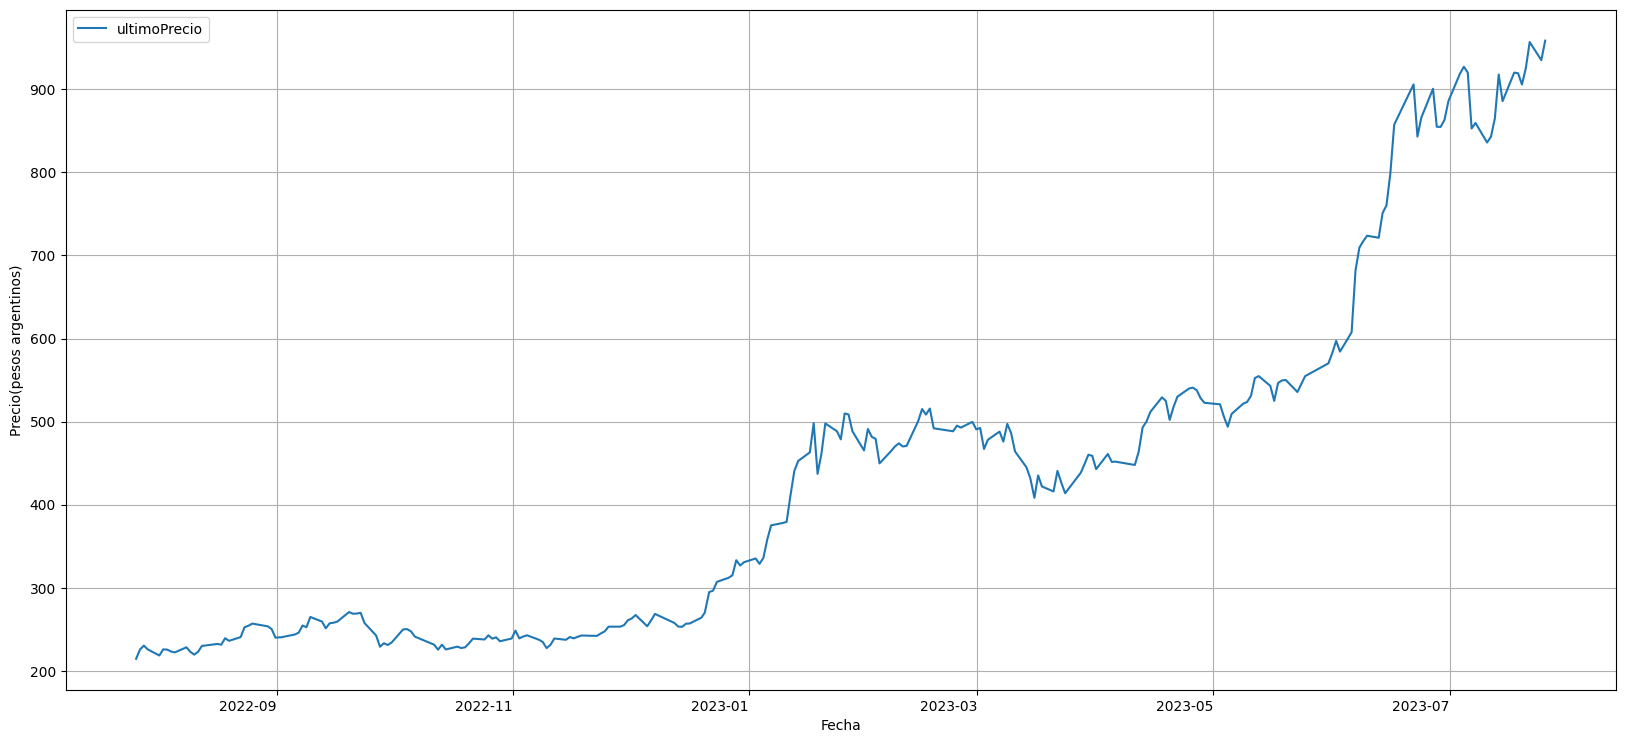

In [16]:
fig = df.plot.line(y="ultimoPrecio", rot=0, figsize=(20, 10), grid=True)
fig.set_xlabel("Fecha")
fig.set_ylabel("Precio(pesos argentinos)")

# Intrumentos


In [17]:
from iol.src.api.constants import Pais


instrumentos = await client_iol.get_instrumentos(pais=Pais.ARG)
instrumentos = pd.DataFrame(data=instrumentos)
instrumentos

,instrumento,pais
0,Acciones,argentina
1,Bonos,argentina
2,Opciones,argentina
3,Cauciones,argentina
4,Futuros,argentina
5,FCI,argentina


# Panel general de un determinado instrumento


In [18]:
from iol.src.api.constants import Instrumento


panel = await client_iol.get_paneles(pais=Pais.ARG, instrumento=Instrumento.ARG.BONOS)
panel = pd.DataFrame(data=panel)
panel

,panel
0,Soberanos en pesos más Cer
1,Soberanos en pesos a tasa variable
2,Soberanos en pesos a tasa fija
3,Soberanos en dólares
4,Soberanos dolar linked
5,Provinciales en pesos
6,Provinciales dolar linked
7,Provinciales en dólares
8,Provinciales en euros
9,Cupones vinculados al PBI


# Titulos


In [19]:
titulo = await client_iol.get_titulo(simbolo="CUAP", mercado=Mercado.BCBA)

In [20]:
titulo = pd.Series(data=titulo)
titulo

simbolo                                          CUAP
descripcion    Bonos Cuasi Par $ 3,31% 2045 (Ley Arg)
pais                                        argentina
mercado                                          bcba
tipo                                  TitulosPublicos
plazo                                              t2
moneda                                 peso_Argentino
dtype: object

# Opciones de un titulo


In [21]:
opciones_titulo = await client_iol.get_titulo_opciones(
    mercado=Mercado.BCBA, simbolo="GGAL"
)

In [22]:
opciones_titulo = pd.DataFrame(data=opciones_titulo)

In [23]:
cotizacion_opciones_titulo = opciones_titulo["cotizacion"].apply(pd.Series)
cotizacion_opciones_titulo = pd.DataFrame(data=cotizacion_opciones_titulo)

In [24]:
opciones_titulo = opciones_titulo.drop(columns=["cotizacion"])
opciones_titulo

,simboloSubyacente,fechaVencimiento,tipoOpcion,simbolo,descripcion,pais,mercado,tipo,plazo,moneda
0,GGAL,2023-08-18,Put,GFGV34304G,Put GGAL 343.04 Vencimiento: 18/08/2023,argentina,bcba,OPCIONES,t1,peso_Argentino
1,GGAL,2023-08-18,Call,GFGC34304G,Call GGAL 343.04 Vencimiento: 18/08/2023,argentina,bcba,OPCIONES,t1,peso_Argentino
2,GGAL,2023-08-18,Call,GFGC37152G,Call GGAL 371.52 Vencimiento: 18/08/2023,argentina,bcba,OPCIONES,t1,peso_Argentino
3,GGAL,2023-08-18,Put,GFGV37152G,Put GGAL 371.52 Vencimiento: 18/08/2023,argentina,bcba,OPCIONES,t1,peso_Argentino
4,GGAL,2023-08-18,Call,GFGC39152G,Call GGAL 391.52 Vencimiento: 18/08/2023,argentina,bcba,OPCIONES,t1,peso_Argentino
...,...,...,...,...,...,...,...,...,...,...
255,GGAL,2023-12-15,Put,GFGV1400DI,"Put GGAL 1,400.00 Vencimiento: 15/12/2023",argentina,bcba,OPCIONES,t1,peso_Argentino
256,GGAL,2023-12-15,Put,GFGV1450DI,"Put GGAL 1,450.00 Vencimiento: 15/12/2023",argentina,bcba,OPCIONES,t1,peso_Argentino
257,GGAL,2023-12-15,Call,GFGC1450DI,"Call GGAL 1,450.00 Vencimiento: 15/12/2023",argentina,bcba,OPCIONES,t1,peso_Argentino
258,GGAL,2023-12-15,Call,GFGC1500DI,"Call GGAL 1,500.00 Vencimiento: 15/12/2023",argentina,bcba,OPCIONES,t1,peso_Argentino


In [25]:
cotizacion_opciones_titulo

,ultimoPrecio,variacion,apertura,maximo,minimo,fechaHora,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
0,0.019,0.0,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
1,611.910,0.0,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
2,600.000,0.0,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
3,0.027,-12.9,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
4,575.830,0.0,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.000,0.0,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
256,0.000,0.0,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
257,0.000,0.0,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
258,0.000,0.0,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0


In [26]:
cotizacion_opciones_titulo.shape, opciones_titulo.shape

((260, 20), (260, 10))

# Cotizacion de un titulo


In [27]:
cotizacion = await client_iol.get_titulo_cotizacion(
    simbolo="GGAL", mercado=Mercado.BCBA
)

In [28]:
puntas_cotizacion = cotizacion["puntas"]
puntas_cotizacion = pd.DataFrame(data=puntas_cotizacion)

In [29]:
puntas_cotizacion

,cantidadCompra,precioCompra,precioVenta,cantidadVenta
0,30.0,913.5,980.0,6.0
1,30.0,878.0,983.0,241.0
2,31.0,850.0,988.0,75.0
3,12.0,805.0,995.0,20.0
4,6.0,800.0,999.0,6.0


In [30]:
cotizacion = pd.Series(data=cotizacion)
cotizacion = cotizacion.drop(labels=["puntas"])
cotizacion

ultimoPrecio                                  960.4
variacion                                       2.7
apertura                                     930.15
maximo                                        963.0
minimo                                        920.0
fechaHora                2023-07-25 20:09:27.677688
tendencia                                      sube
cierreAnterior                                935.1
montoOperado                          1094253602.95
volumenNominal                              1151802
precioPromedio                                  0.0
moneda                               peso_Argentino
precioAjuste                                    0.0
interesesAbiertos                               0.0
cantidadOperaciones                            2163
descripcionTitulo      Grupo Financiero Galicia S.A
plazo                                            T2
laminaMinima                                      1
lote                                              1
dtype: objec

# Panel de cotizaciones


In [31]:
from iol.src.api.constants import Panel


panel_cotizaciones = await client_iol.get_panel_cotizaciones(
    pais=Pais.ARG,
    instrumento=Instrumento.ARG.BONOS,
    panel=Panel.ARG.BONOS.SOBERANO_ARS_CER,
)

In [32]:
titulos_panel_cotizaciones = panel_cotizaciones["titulos"]

In [33]:
def flat_titulo(titulo):
    return {
        **titulo,
        "puntas": None,
        "precioCompra": titulo["puntas"]["precioCompra"],
        "precioVenta": titulo["puntas"]["precioVenta"],
        "cantidadCompra": titulo["puntas"]["cantidadCompra"],
        "cantidadVenta": titulo["puntas"]["cantidadVenta"],
    }

In [34]:
titulos_flated = [flat_titulo(titulo) for titulo in titulos_panel_cotizaciones]
titulos_flated = pd.DataFrame(data=titulos_flated)
titulos_flated = titulos_flated.drop(columns=["puntas"])
titulos_flated

,simbolo,descripcion,ultimoPrecio,variacionPorcentual,apertura,maximo,minimo,ultimoCierre,volumen,cantidadOperaciones,fecha,tipoOpcion,precioEjercicio,fechaVencimiento,mercado,moneda,precioCompra,precioVenta,cantidadCompra,cantidadVenta
0,CUAP,"Bonos Cuasi Par $ 3,31% 2045 (Ley Arg)",5600.0,2.08,5450.0,5690.0,5319.0,5600.0,0.0,31.0,2023-07-25 17:09:27.200,None,None,None,BCBA,AR$,5350.0,5600.0,658.0,476.0
1,DICP,Bono Discount $ 2033 (Ley Arg),8410.0,-0.35,8550.0,8649.5,8370.0,8410.0,0.0,243.0,2023-07-25 17:09:27.200,None,None,None,BCBA,AR$,8400.0,8410.0,593.0,134516.0
2,DIP0,Bono Discount $ + CER 2033 (Ley Arg),8300.0,0.74,8239.0,8300.0,8239.0,8300.0,0.0,13.0,2023-07-25 17:09:27.200,None,None,None,BCBA,AR$,8300.0,8320.0,2.0,9000.0
3,PAP0,Bonos Par AR$ + CER 2038 (Ley Arg),3950.0,-1.17,3960.0,3960.0,3950.0,3950.0,0.0,2.0,2023-07-25 17:09:27.330,None,None,None,BCBA,AR$,3960.0,4138.0,5000.0,4.0
4,PARP,Bono Par $ (Ley Arg),4190.0,1.09,4110.0,4199.0,4110.0,4190.0,0.0,65.0,2023-07-25 17:09:27.333,None,None,None,BCBA,AR$,3078.5,4190.0,200.0,7634.0
5,PR13,Bocon - Bono de Consolidación $ 6 Serie,825.0,0.36,817.9,829.0,797.4,825.0,0.0,35.0,2023-07-25 17:09:27.387,None,None,None,BCBA,AR$,821.0,830.0,142330.0,5999.0


# Detalle mobile de una cotizacion

In [36]:
from iol.src.api.constants import Plazo


cotizacion_detalle_mobile = await client_iol.get_titulo_cotizacion_plazo(
    mercado=Mercado.BCBA, simbolo="GGAL", plazo=Plazo.T0
)
cotizacion_detalle_mobile

{'operableCompra': True,
 'operableVenta': False,
 'visible': True,
 'ultimoPrecio': 958.65,
 'variacion': 2.7,
 'apertura': 930.15,
 'maximo': 963.0,
 'minimo': 920.0,
 'fechaHora': datetime.datetime(2023, 7, 25, 17, 9, 27, 677000),
 'tendencia': 'mantiene',
 'cierreAnterior': 958.65,
 'montoOperado': 1094253602.95,
 'volumenNominal': 0,
 'precioPromedio': 0.0,
 'moneda': 'peso_Argentino',
 'precioAjuste': 0.0,
 'interesesAbiertos': 0.0,
 'puntas': [{'cantidadCompra': 1.0,
   'precioCompra': 490.0,
   'precioVenta': 999.0,
   'cantidadVenta': 100.0},
  {'cantidadCompra': 18.0,
   'precioCompra': 250.0,
   'precioVenta': 0.0,
   'cantidadVenta': 0.0}],
 'cantidadOperaciones': 2163,
 'simbolo': 'GGAL',
 'pais': 'argentina',
 'mercado': 'bcba',
 'tipo': 'acciones',
 'descripcionTitulo': 'Grupo Financiero Galicia S.A',
 'plazo': 't0',
 'laminaMinima': 1,
 'lote': 1,
 'cantidadMinima': 1,
 'puntosVariacion': 0.0}